# **Perception and Mapping - Project 1**

**Group:**
\
Duarte Ribeiro Afonso Branco (up201905327)
\
Miguel Filipe Santos Silva   (up201904672)

In [ ]:
!gdown --folder 'https://drive.google.com/drive/folders/19N8vuVIeTrpNTq6mzMtyVYyY4kKNYfy0?usp=sharing'
global prefix
prefix = 'Datasets/'

Retrieving folder list
Processing file 1VyXCvDEm5No76boqXGdi08oQ9x5H3rjo data1.txt
Processing file 1m69kPMwp1G2mjpTwb7zoVRQ8hmVhqapH data2.txt
Processing file 1MdGR8OuVXVTT4mr9GyTbg4OwmLvT9iKw data3.txt
Processing file 1BgkoUBZ9rHhkXHum1yPhLDAkmVXBlO1w data4.txt
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1VyXCvDEm5No76boqXGdi08oQ9x5H3rjo
To: /content/Datasets/data1.txt
100% 322k/322k [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1m69kPMwp1G2mjpTwb7zoVRQ8hmVhqapH
To: /content/Datasets/data2.txt
100% 322k/322k [00:00<00:00, 150MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MdGR8OuVXVTT4mr9GyTbg4OwmLvT9iKw
To: /content/Datasets/data3.txt
100% 258k/258k [00:00<00:00, 88.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BgkoUBZ9rHhkXHum1yPhLDAkmVXBlO1w
To: /content/Datasets/data4.txt
100% 258k/258k [00:00<00:00, 67.6MB/s]
Download c

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

#from matplotlib import animation
#from IPython.display import display, clear_output

from matplotlib.animation import FuncAnimation
from IPython import display


# **Note on plotting videos**:
\
Please **verify the results before running the Colab, because the videos are already plotted**. Since the **time to generate the animation is very high**, this flag is set to false, so when you run the Colab the videos won't be generated. This is so the actual results can be verified without taking too much time. If you wish to verify the video plotting code, set it to true.

In [ ]:
plotVideos = False#True

### **General functions**

In [ ]:
## Read data file
def read_data(filename):
  # Initialize Global variables
  global t_real
  global x_real
  global y_real
  global theta_real
  global v_meas
  global omega_meas
  global r_1_meas
  global phi_1_meas


  # Open the file for reading
  with open(filename, 'r') as file:
    # Read the lines from the file
    lines = file.readlines()

  # Initialize an empty list to store the parsed data
  data = []

  # Iterate through the lines
  for line in lines:
      # Split each line into individual elements using spaces as separators
      elements = line.strip().split()

      # Convert the elements to integers (or floats, if needed)
      row_data = [float(element) for element in elements]

      # Append the row data to the main data list
      data.append(row_data)

  # Reshape data to array
  lines   = len(data)
  columns = len(data[0])
  print("Read from file ", lines, " lines and ", columns, "columns")
  data    = np.array(data).reshape(lines, columns)

  t_real       = data[: , 0]
  x_real       = data[: , 1]
  y_real       = data[: , 2]
  theta_real   = data[: , 3]
  v_meas       = data[: , 4]
  omega_meas   = data[: , 5]
  r_1_meas     = data[: , 6]
  phi_1_meas   = data[: , 7]

  if columns > 8:
    global r_2_meas
    global phi_2_meas
    r_2_meas     = data[: , 8]
    phi_2_meas   = data[: , 9]

  print("Successfully read data!")

  return np.array(data)

In [ ]:
# Plot my stuff :)
# FIXME: Add plot print
def plot_data(X, P, Beacons, initialTime, finalTime = -1):
  #print("Estimated position ", X[len(X)-1])
  # print("Real position", [x_real[2000], y_real[2000], theta_real[2000]])
  # print("Cov matrix:\n", P[0][])

  if(finalTime == -1):
    finalTime = len(X)

  P_plot = [ [], [], [], [], [], [], [], [], []]
  for i in range(initialTime, finalTime):
    P_plot[0].append(P[i][0][0])   #cov(XX)
    P_plot[1].append(P[i][0][1])   #cov(XY)
    P_plot[2].append(P[i][0][2])   #cov(Xtheta)
    P_plot[3].append(P[i][1][0])   #cov(YX)
    P_plot[4].append(P[i][1][1])   #cov(YY)
    P_plot[5].append(P[i][1][2])   #cov(Ytheta)
    P_plot[6].append(P[i][2][0])   #cov(thetaX)
    P_plot[7].append(P[i][2][1])   #cov(thetaY)
    P_plot[8].append(P[i][2][2])   #cov(thetatheta)

  X_plot = np.array(X).reshape(len(X), 3)
  X_plot = X_plot[:finalTime]
  #print("X0 on array ", X_plot[len(X_plot)-1])

  Beacons_plot = np.array(Beacons).reshape(len(Beacons), 2)


  plt.figure(figsize=(12, 6))
  plt.plot(t_real[initialTime:finalTime + initialTime], x_real[initialTime:finalTime + initialTime], label="Measured x")
  plt.plot(t_real[initialTime:finalTime + initialTime], y_real[initialTime:finalTime + initialTime], label="Measured y")
  plt.plot(t_real[initialTime:finalTime + initialTime], theta_real[initialTime:finalTime + initialTime], label="Measured Theta")
  plt.plot(t_real[initialTime:finalTime + initialTime], X_plot[:, 0], label="Estimated x")
  plt.plot(t_real[initialTime:finalTime + initialTime], X_plot[:, 1], label="Estimated y")
  plt.plot(t_real[initialTime:finalTime + initialTime], X_plot[:, 2], label="Estimated theta")
  plt.xlabel("Time")
  plt.ylabel("Position")
  plt.title("Measured vs Estimated values")
  plt.legend()
  plt.grid()
  plt.show()

  plt.figure(figsize=(12, 6))
  plt.plot(x_real[initialTime:finalTime + initialTime], y_real[initialTime:finalTime + initialTime], label="Measured Position")
  plt.plot(X_plot[:, 0], X_plot[:, 1], label="Estimate Position")
  plt.plot(Beacons_plot[:, 0], Beacons_plot[:, 1], 'ro', label="Beacon") # 'ro' for red points
  plt.plot()
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("Measured vs Estimated position")
  plt.legend()
  plt.grid()
  plt.show()


  plt.figure(figsize=(12, 6))
  plt.plot(t_real[initialTime:finalTime + initialTime], P_plot[0], label="Covariance x")
  plt.plot(t_real[initialTime:finalTime + initialTime], P_plot[4], label="Covariance y")
  plt.plot(t_real[initialTime:finalTime + initialTime], P_plot[8], label="Covariance Theta")
  plt.xlabel("Time")
  plt.ylabel("Covariance")
  plt.title("EKF Covariances")
  plt.legend()
  plt.grid()
  plt.show()


In [ ]:
def plot_position_video(X, x_real, y_real, initialTime = 0, finalTime=-1):

    if finalTime == -1:
        finalTime = len(X) - 1 # -1 cuz you always estimate one more after last instant
        #print("final time:", finalTime)

    X_plot = np.array(X).reshape(len(X), 3)
    X_plot = X_plot[:finalTime]


    x_real_plot = x_real[initialTime:finalTime]
    y_real_plot = y_real[initialTime:finalTime]

    x_estimate_plot = X_plot[initialTime:finalTime, 0]
    y_estimate_plot = X_plot[initialTime:finalTime, 1]



    fig, ax = plt.subplots(figsize=(12, 6))

    # Set x and y axis limits
    plt.xlim(math.ceil(min (min(x_real_plot), min(x_estimate_plot))) - 1, math.ceil(max (max(x_real_plot), max(x_estimate_plot))) + 1)
    plt.ylim(math.ceil(min (min(y_real_plot), min(y_estimate_plot))) - 1, math.ceil(max (max(y_real_plot), max(y_estimate_plot))) + 1)


    line_real, = plt.plot([], color='blue', label="Measured Position")
    line_estimate, = plt.plot([], color='orange', label="Estimate Position")

    # Set up the plot properties
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    ax.grid()


    # Define an update function to create each frame
    def update(frame):

        #print("Curr frame: ", frame)
        line_real.set_data(x_real_plot[:frame], y_real_plot[:frame])
        line_estimate.set_data(x_estimate_plot[:frame], y_estimate_plot[:frame])




    # Create the animation
    ani = FuncAnimation(fig, update, frames=finalTime, repeat=True, blit=False, interval = 30)
    video = ani.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close

### **System behaviour matrices and EKF functions**

In [ ]:
#FIXME: rename some of these functions

# Computes the Jacobian Matrixes for the state after previous step
def linearize_states(theta_k, v_k, omega_k, delta_t):

  F_x = np.array([[1, 0, v_k/omega_k * (math.cos(theta_k + (omega_k * delta_t)) - math.cos(theta_k))],
                  [0, 1, v_k/omega_k * (math.sin(theta_k + (omega_k * delta_t)) - math.sin(theta_k))],
                  [0, 0,                                                                           1]])

  F_w = np.array([[(math.sin(theta_k + omega_k*delta_t) - math.sin(theta_k)) / omega_k                  ,
                 v_k / (omega_k**2) *( (delta_t * math.cos(theta_k + (omega_k * delta_t)) * omega_k)
                                      - math.sin(theta_k + (omega_k * delta_t))
                                      + math.sin(theta_k)                                       )],
                  [(- math.cos(theta_k + omega_k*delta_t) + math.cos(theta_k)) / omega_k                ,
                 v_k / (omega_k**2) *( (delta_t * math.sin(theta_k + (omega_k * delta_t)) * omega_k)
                                      + math.cos(theta_k + (omega_k * delta_t))
                                      - math.cos(theta_k)                                       )],
                   [ 0, delta_t]])


  return F_x, F_w

# Calculates the Measurements Jacobian
def measurements_jacobian(B_k, X_k, dist_e, bear_e):

  F_h = np.array([[-(B_k[0] - X_k[0]) / dist_e   , -(B_k[1] - X_k[1]) / dist_e    ,  0],
                  [ (B_k[1] - X_k[1])/(dist_e**2), -(B_k[0] - X_k[0]) /(dist_e**2), -1]])

  return F_h

# Predicts state
def predict_step(X_k, U_k, F_x, F_w, P_k, Q, delta_t):

  # Predict State using state model equations
  X_k[0] = X_k[0] + (U_k[0]/U_k[1]*(  np.sin(X_k[2] + U_k[1]*delta_t) - np.sin(X_k[2])))
  X_k[1] = X_k[1] + (U_k[0]/U_k[1]*(- np.cos(X_k[2] + U_k[1]*delta_t) + np.cos(X_k[2])))
  X_k[2] = X_k[2] +  U_k[1]*delta_t
  X_k[2] = normalize_angle(X_k[2])

  #FIXME: The good file I found is saying here is only Q. But I think we have to multiply Q for f_w. Why??
  # Predict Covariance
  P_k = (F_x @ P_k @ F_x.T) + (F_w @ Q @ F_w.T)

  return X_k, P_k

# Updates prediction based on observations
def update_step(X_k, P_k, F_h, Z_meas, Z_estimate, R):

    # Calculate Kalman Gain
    S = F_h @ P_k @ F_h.T   # 2x2
    K = P_k @ F_h.T @ np.linalg.inv(S + R)

    # Update Covariance Matrix
    P_k = (np.eye(3) - (K @ F_h)) @ P_k

    # Measurements Difference
    Z_dif = measurements_error(Z_meas, Z_estimate)

    X_k = X_k + K @ (Z_dif)
    X_k[2] = normalize_angle(X_k[2])

    return X_k, P_k

# Calculates the difference between the estimate and the measurent reading
def measurements_error(Z_meas, Z_est):
    # Measurements difference
    Z_dif = []
    Z_dif.append(Z_meas[0] - Z_est[0])
    Z_dif.append(normalize_angle(Z_meas[1] - Z_est[1]))

    return Z_dif


# Normalizes theta from running behind its tail
def normalize_angle(angle):
    while angle > math.pi:
        angle -= (2*math.pi)
    while angle < -math.pi:
        angle += (2*math.pi)
    return angle


# Defines the distance and bearing the robot would see to the real position of the beacon
def beacons_location_from_robot(X_k, B_k):

    dist          = math.sqrt((B_k[0] - X_k[0])**2 + ((B_k[1] - X_k[1])**2))
    ang_to_beacon = math.atan2(B_k[1] - X_k[1], B_k[0] - X_k[0])    # Retrieves the angle of a Vector pointing from the robot to the beacon
    ang_to_beacon = normalize_angle(ang_to_beacon)
    bear          = ang_to_beacon - X_k[2]
    bear          = normalize_angle(bear)


    return [dist, bear]

def measurements_beacon_estimate(X_k, dist, bear):

    # Beacon position estimated by the measurements
    x_beacon = X_k[0] + dist*math.cos(bear + X_k[2])
    y_beacon = X_k[1] + dist*math.sin(bear + X_k[2])

    return [x_beacon, y_beacon]

# Calculate beacon distance from measurement to known Beacon
def measurement_dist_to_beacon(X_k, B_k, dist, bear):
    # bearing comes normalized

    # Beacon position estimated by the measurements
    B_est = measurements_beacon_estimate(X_k, dist, bear)

    # Measurements distance to real Beacon
    dist = math.sqrt((B_est[0] - B_k[0])**2 + (B_est[1] - B_k[1])**2)

    return dist

### **Task 1)**  
Consider that there are two landmaks located at (0, 0) and (10, 0), and that the initial pose of the robot
is known. Design and implement an algorithm to estimate the position and orientation of the robot
based on the measurements of linear and angular velocities and also on the distances and bearings to
the two beacons. Use the data in file data1.txt to test the algorithm.

Using the model equations:
\
$\dot{x} = v \cos(\theta)$
\
$\dot{y} = v \sin(\theta)$
\
$\dot{\theta} = w$
\
The linear model equations could be determined:
\
$ x_{k+1} = x_k + \frac{v_k}{w_k} \left(\sin(\theta_k + w_k \Delta t) - \sin(\theta_k)\right) $

$ y_{k+1} = y_k + \frac{v_k}{w_k} \left(-\cos(\theta_k + w_k \Delta t) + \cos(\theta_k)\right) $

$ \theta_{k+1} = \theta_k + w_k \cdot \Delta t $
\
The state vector corresponds to:
\
X_k : \begin{bmatrix}
x_k \\
y_k \\
\theta_k
\end{bmatrix}


By calculating the Jacobians of these equations, with respect to x, y and $\theta$; and v and w, the F_x and F_w matrices were determined:


F_x : \begin{bmatrix}
1 & 0 & -v_k \cdot \sin(\theta_k + \omega_k \Delta t) \cdot \Delta t \\
0 & 1 & v_k \cdot \cos(\theta_k + \omega_k \Delta t) \cdot \Delta t \\
0 & 0 & 1
\end{bmatrix}

\

F_w :\begin{bmatrix}
\frac{\sin(\theta_k + \omega_k \Delta t) - \sin(\theta_k)}{\omega_k} &
\frac{v_k}{\omega_k^2} \left(\Delta_t \cos(\theta_k + \omega_k \Delta_t) \omega_k - \sin(\theta_k + \omega_k \Delta_t) + \sin(\theta_k)\right) \\
-\frac{\cos(\theta_k + \omega_k \Delta t) - \cos(\theta_k)}{\omega_k} &
\frac{v_k}{\omega_k^2} \left(\Delta_t \sin(\theta_k + \omega_k \Delta_t) \omega_k + \cos(\theta_k + \omega_k \Delta_t) - \cos(\theta_k)\right) \\
0 & \Delta t
\end{bmatrix}
\
The measurement equations for the distance and bearing to the beacon were calculated:
\
$ r_{\text{beacon}} = \sqrt{(x_{\text{beacon}} - x_k)^2 + (y_{\text{beacon}} - y_k)^2} $
\
$ \theta_{\text{beacon}} = \text{atan2}(y_{\text{beacon}} - y_k, x_{\text{beacon}} - x_k) - \theta_k $
\
Note that care was taken to normalize all angles.
\
By calculating the Jacobian of these equations with respect to x, y distances, and $\theta$, F_h was determined:

F_h :  \begin{bmatrix}
-\frac{x_{\text{beacon}} - x_k}{\sqrt{(x_{\text{beacon}} - x_k)^2 + (y_{\text{beacon}} - y_k)^2}} & -\frac{y_{\text{beacon}} - y_k}{\sqrt{(x_{\text{beacon}} - x_k)^2 + (y_{\text{beacon}} - y_k)^2}} & 0 \\
\frac{y_{\text{beacon}} - y_k}{\left(\sqrt{(x_{\text{beacon}} - x_k)^2 + (y_{\text{beacon}} - y_k)^2}\right)^2} & -\frac{x_{\text{beacon}} - x_k}{\left(\sqrt{(x_{\text{beacon}} - x_k)^2 + (y_{\text{beacon}} - y_k)^2}\right)^2} & -1
\end{bmatrix}

\
Finally a EKF was implemented using these matrices. In each cycle the EKF Predict step was done, followed by the Update Step.
\
The Predict step used the linear model equations to predict the state variables. The covariance matrix was calculated as:
$P_{k+1} = F_x \cdot P_k \cdot F_x^T + F_w \cdot Q \cdot F_w^T$
\
The Update step was then implemented:
\
$S = F_h \cdot P_k \cdot F_h^T   $
\
$K = P_k \cdot F_h^T \cdot (S + R)^{-1}$
\
$P_{k+1} = (\mathbb{I} - (K \cdot F_h)) \cdot P_k$
\
$Z_{\text{dif}} = Z_{estimated} - Z_{real}$
\
(Note that Z is the measurements vector: $Z = [r, \theta]^T$. $Z_{estimated}$ was calculated having into account the current estimated robot position to the beacon, while $Z_{real}$ is the received measurements)
\
$X_{k+1} = X_k + K \cdot Z_{\text{dif}}$
\
The Update step was done seperatly for both beacons, since a different F_h matrix was associated with each beacon.



In [ ]:
## Task 1)

def task_1():

  # Read data file
  file = prefix + 'data1.txt'
  read_data(file)

  steps = len(t_real)             # Number of steps
  delta_t = t_real[1]- t_real[0]  # 0.1 seconds


  ## Covariances and Noise
  # Inputs Covariance
  sigma_linvel = 0.5
  sigma_omega  = 0.05

  # Beacons Covariance
  sigma_dist = 0.5
  sigma_bear = 0.1

  Q = np.array([[sigma_linvel**2, 0],
                [0,  sigma_omega**2]])

  R = np.array( [[sigma_dist**2,  0],
                 [0,  sigma_bear**2]])


  # Beacons Position
  Beacon_1 = [0 , 0]
  Beacon_2 = [10, 0]

  # System state Covariance Initialization
  X , P = [], []
  X.append(np.array([x_real[0], y_real[0], theta_real[0]]))
  P.append(np.eye(3)*0.1)

  ## Run the system through the filter
  for step in range(steps):

    # Initialize one time variables
    P_step = P[step]
    X_step = X[step]

    # Normalize Theta
    X_step[2] = normalize_angle(X[step][2])


    # Prior Jacobian Estimate
    F_x, F_w = linearize_states(X_step[2], v_meas[step], omega_meas[step], delta_t)
    U = [v_meas[step], omega_meas[step]]

    # Predict Step
    X_step, P_step = predict_step(X_step, U, F_x, F_w, P_step, Q, delta_t)

    # Calculate observation estimate, verified
    Z_1 = beacons_location_from_robot(X_step, Beacon_1)
    Z_2 = beacons_location_from_robot(X_step, Beacon_2)


    # Calculate Measurements Jacobian, verified
    F_h_1 = measurements_jacobian(Beacon_1, X_step, Z_1[0], Z_1[1])
    F_h_2 = measurements_jacobian(Beacon_2, X_step, Z_2[0], Z_2[1])


    # Update Step
    X_step, P_step = update_step(X_step, P_step, F_h_1, [r_1_meas[step], normalize_angle(phi_1_meas[step])], Z_1, R)
    X_step, P_step = update_step(X_step, P_step, F_h_2, [r_2_meas[step], normalize_angle(phi_2_meas[step])], Z_2, R)

    # Append values

    X.append(copy.deepcopy(X_step))
    P.append(copy.deepcopy(P_step))


  plot_data(X[:2000], P, [Beacon_1, Beacon_2], 0, -1)

  if plotVideos == True:
    plot_position_video(X, x_real, y_real, 0, -1)


Read from file  2000  lines and  10 columns
Successfully read data!


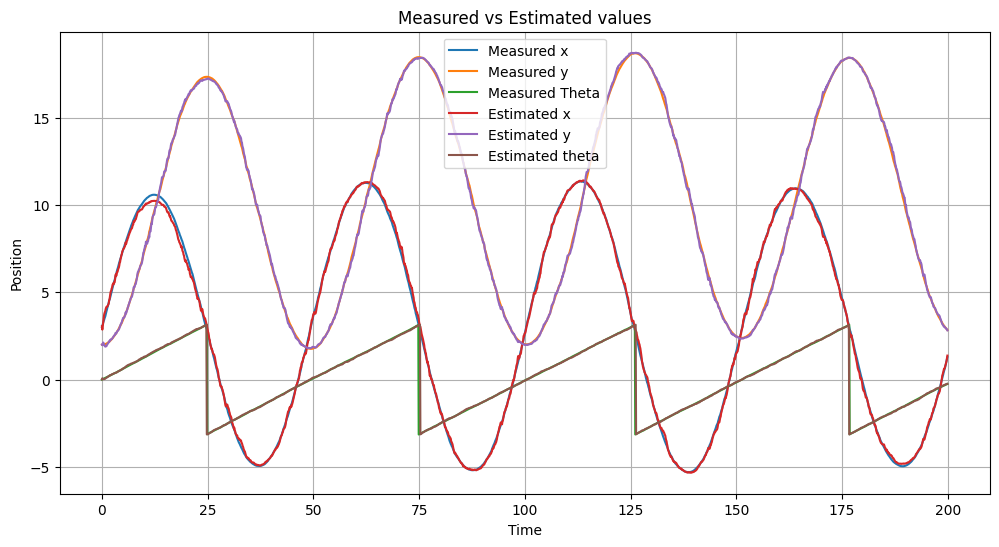

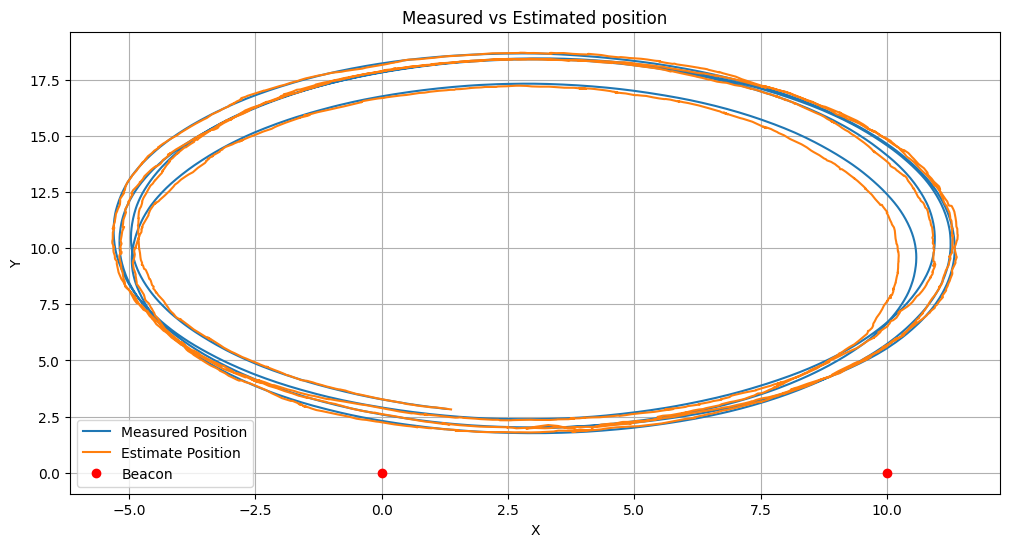

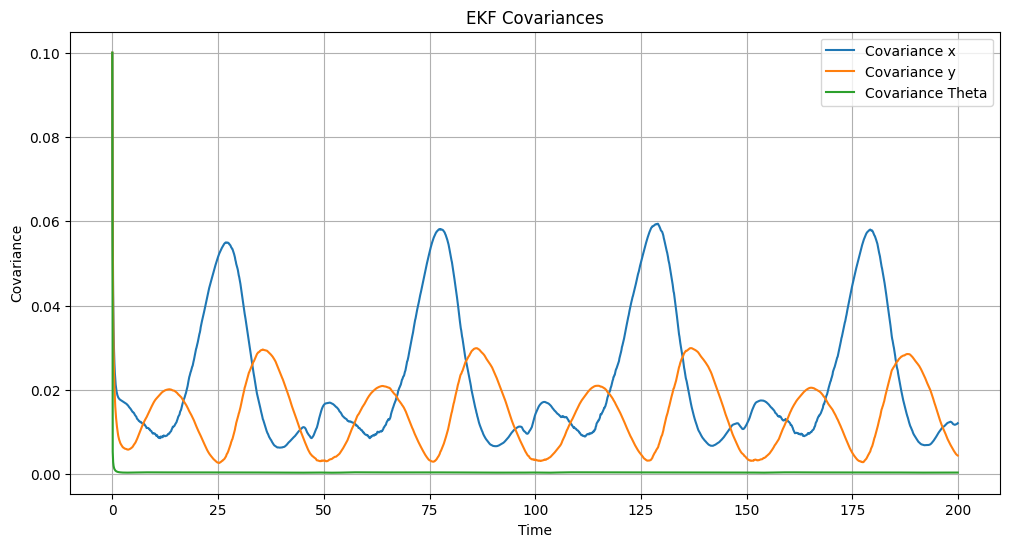

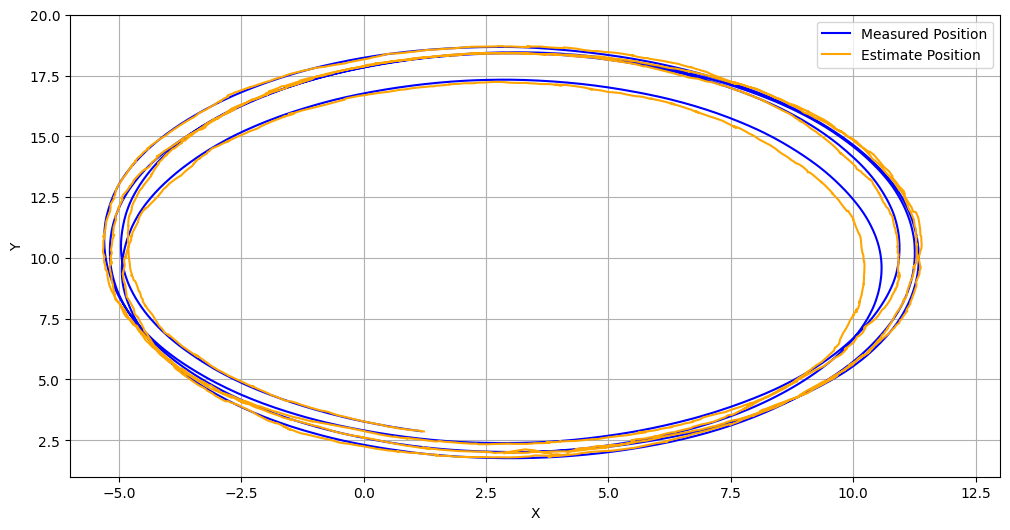

In [ ]:
task_1()

### **Task 2)**  
Now assume that laser system has a finite field of view. When each landmark is not within the field of
view (±
π/4
) the range measurement returns 0. Adapt the previous algorithm to take into account this
field of view constraint. Use the data in file data2.txt to test the algorithm. The columns of this file
are t, x, y, θ, v, ω, r1, ψ1, r2, ψ2.

For this exercise when there was no beacon measurement was available, due to the field of view constraint, the EKF Update step was not done, so only the Predict step was done.
\
Note that the Update step was only skiped having into account which beacon was unavailable.
\
For example, if there were no measurements for Beacon 1, the Update step was still done for Beacon 2. When a beacon measurement was available, both the Predict and Update step were done.   

In [ ]:
## Task 2)

def task_2():
  # Read data file
  file = prefix + 'data2.txt'
  read_data(file)
  #print("R1_meas: \n ", r_1_meas[25:35])
  #print("R2_meas: \n ", r_2_meas[25:35])

  steps = len(t_real)             # Number of steps
  delta_t = t_real[1]- t_real[0]  # 0.1 seconds


  ## Covariances and Noise
  # Inputs Covariance
  sigma_linvel = 0.5
  sigma_omega  = 0.05

  # Beacons Covariance
  sigma_dist = 0.5
  sigma_bear = 0.1

  Q = np.array([[sigma_linvel**2, 0],
                [0, sigma_omega**2]])

  R = np.array( [[sigma_dist**2,  0],
                   [0,  sigma_bear**2]])

  # Beacons Position
  Beacon_1 = [0 , 0]
  Beacon_2 = [10, 0]

  # System state and Observations
  X , P = [], []
  X.append(np.array([x_real[0], y_real[0], theta_real[0]]))
  P.append(np.eye(3))
  ## Run the system through the filter
  for step in range(steps):

    # Initialize one time variables
    P_step = P[step]
    X_step = X[step]

    # Normalize Theta
    X_step[2] = normalize_angle(X_step[2])

    # Prior Jacobian Estimate
    F_x, F_w = linearize_states(X_step[2], v_meas[step], omega_meas[step], delta_t)
    U = [v_meas[step], omega_meas[step]]

    # Predict Step
    X_step, P_step = predict_step(X_step, U, F_x, F_w, P_step, Q, delta_t)


    if (r_1_meas[step] != 0):
        Z_1 = beacons_location_from_robot(X_step, Beacon_1)
        F_h_1 = measurements_jacobian(Beacon_1, X_step, Z_1[0], Z_1[1])

        X_step, P_step = update_step(X_step, P_step, F_h_1, [r_1_meas[step], normalize_angle(phi_1_meas[step])], Z_1, R)


    if (r_2_meas[step] != 0):
        Z_2 = beacons_location_from_robot(X_step, Beacon_2)
        F_h_2 = measurements_jacobian(Beacon_2, X_step, Z_2[0], Z_2[1])

        X_step, P_step = update_step(X_step, P_step, F_h_2, [r_2_meas[step], normalize_angle(phi_2_meas[step])], Z_2, R)

    # Append values
    X.append(copy.deepcopy(X_step))
    P.append(copy.deepcopy(P_step))


  plot_data(X[:2000], P, [Beacon_1, Beacon_2], 0, -1)
  if plotVideos == True:
     plot_position_video(X, x_real, y_real, 0, -1)

Read from file  2000  lines and  10 columns
Successfully read data!


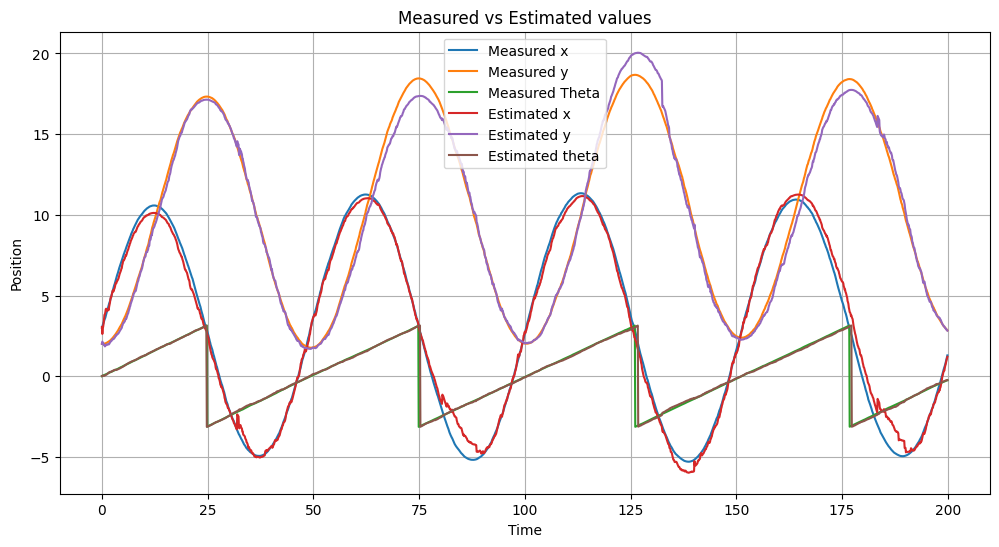

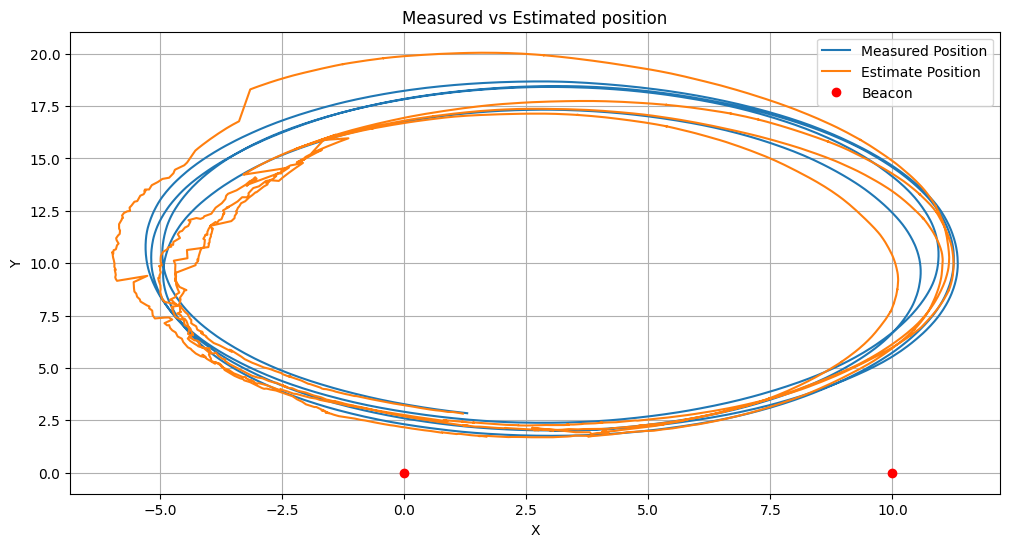

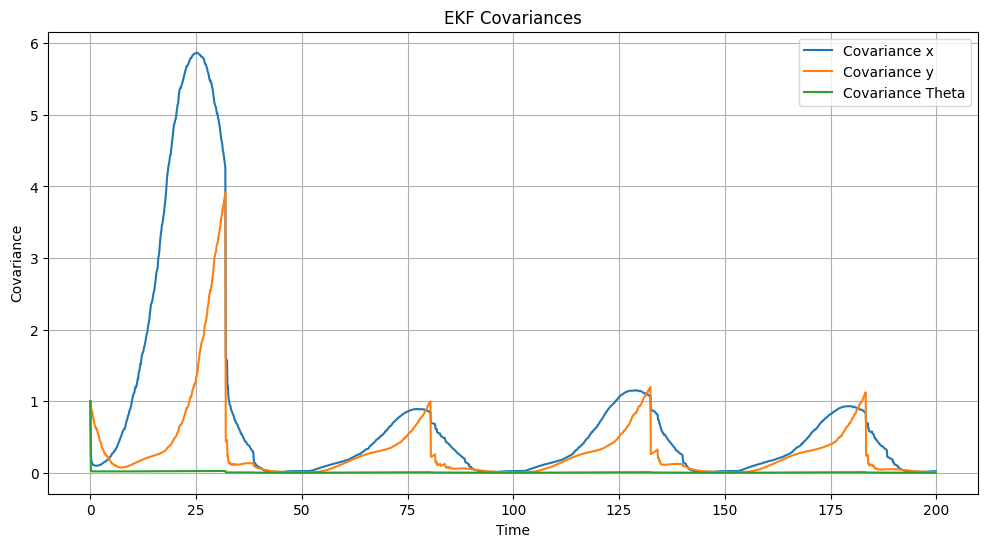

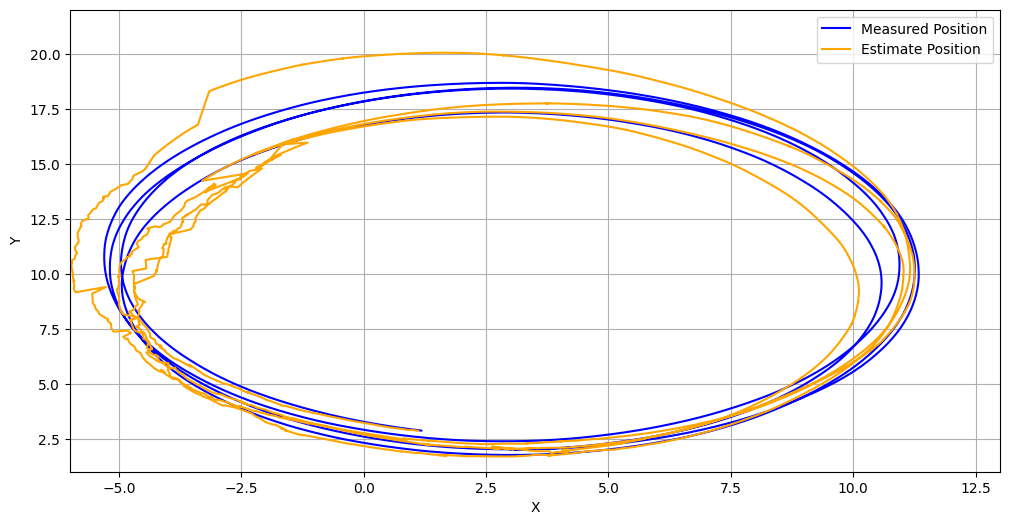

In [ ]:
task_2()

### **Task 3)**  
Now assume that besides the field of view constraint the laser system only returns the range/bearing to
the closest landmark, not proving information to which lankmark the measrument refers . Update to
algorithm to deal with such feature. Use the data in file data3.txt to test the algorithm. The columns
of this file are t, x, y, θ, v, ω, r, ψ.


In this exercise we had to determine to which beacon the measurements corresponded to.
\
Having into account the current estimated robot position, the received beacon position was calculated, using the received radius and angle.
\
Then the received beacon position was compared to the known beacon positions, using the euclidian distance. The smallest distance indicated which beacon the measurements corresponded to.
\
The field of view constraints was inplemented as in Task 2.

In [ ]:
## Task 3)
# Taking into account the previous file reading
# There is room for improvement

def task_3():

  # Read data file
  file = prefix + 'data3.txt'
  read_data(file)

  steps = len(t_real)             # Number of steps
  delta_t = t_real[1]- t_real[0]  # 0.1 seconds


  ## Covariances and Noise
  # Inputs Covariance
  sigma_linvel = 0.5
  sigma_omega  = 0.05

  # Beacons Covariance
  sigma_dist = 0.5
  sigma_bear = 0.1

  Q = np.array([[sigma_linvel**2, 0],
                [0, sigma_omega**2]])

  R = np.array( [[sigma_dist**2,  0],
                [0,  sigma_bear**2]])


  # Beacons Position
  Beacon_1 = [0 , 0]
  Beacon_2 = [10, 0]

  # System state and Observations
  X , P = [], []
  X.append(np.array([x_real[0], y_real[0], theta_real[0]]))
  P.append(np.eye(3)*0.5)

  ## Run the system through the filter
  for step in range(steps):

      # Initialize one time variables
      P_step = P[step]
      X_step = X[step]

      # Normalize Theta
      X_step[2] = normalize_angle(X_step[2])

      # Prior Jacobian Estimate
      F_x, F_w = linearize_states(X_step[2], v_meas[step], omega_meas[step], delta_t)
      U = [v_meas[step], omega_meas[step]]

      # Predict Step
      X_step, P_step = predict_step(X_step, U, F_x, F_w, P_step, Q, delta_t)

      if (r_1_meas[step] != 0):

          dist_1 = measurement_dist_to_beacon(X_step, Beacon_1, r_1_meas[step], normalize_angle(phi_1_meas[step]))
          dist_2 = measurement_dist_to_beacon(X_step, Beacon_2, r_1_meas[step], normalize_angle(phi_1_meas[step]))

          Beacon_detect = []
          if(dist_1 > dist_2):
              Beacon_detect = Beacon_2
          else:
              Beacon_detect = Beacon_1

          Z = beacons_location_from_robot(X_step, Beacon_detect)
          F_h = measurements_jacobian(Beacon_detect, X_step, Z[0], Z[1])

          X_step, P_step = update_step(X_step, P_step, F_h, [r_1_meas[step], normalize_angle(phi_1_meas[step])], Z, R)

      # Append values
      X.append(copy.deepcopy(X_step))
      P.append(copy.deepcopy(P_step))


  plot_data(X[:2000], P, [Beacon_1, Beacon_2], 0, -1)
  if plotVideos == True:
     plot_position_video(X, x_real, y_real, 0, -1)

Read from file  2000  lines and  8 columns
Successfully read data!


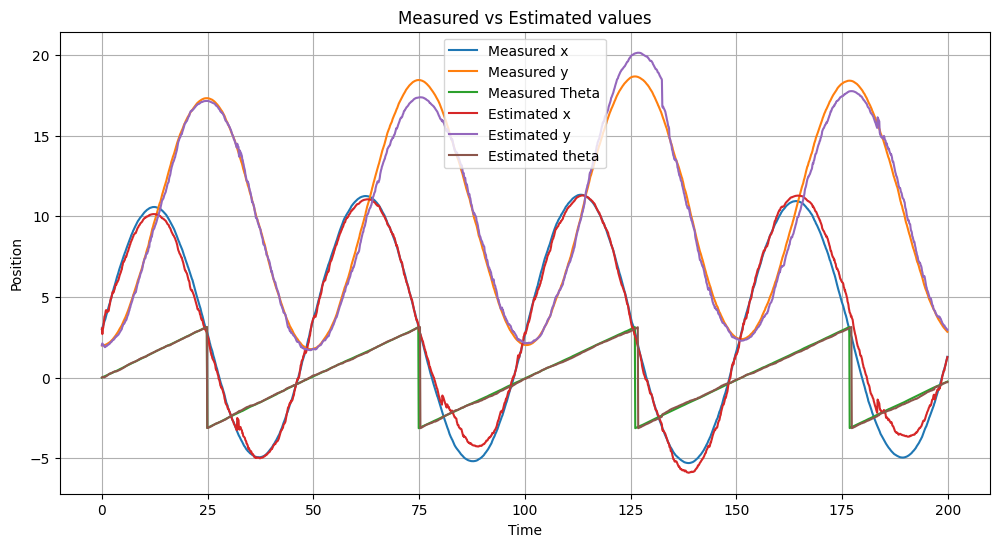

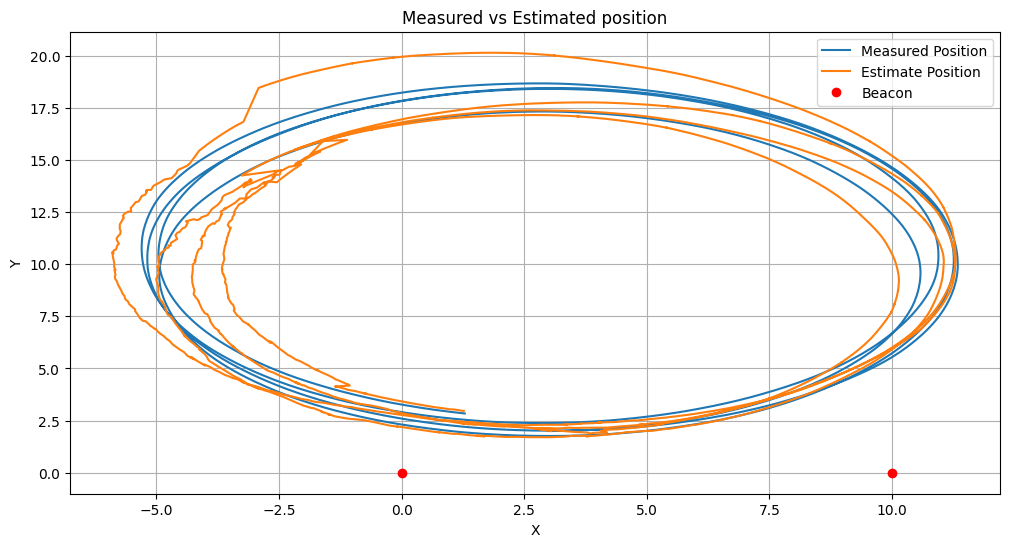

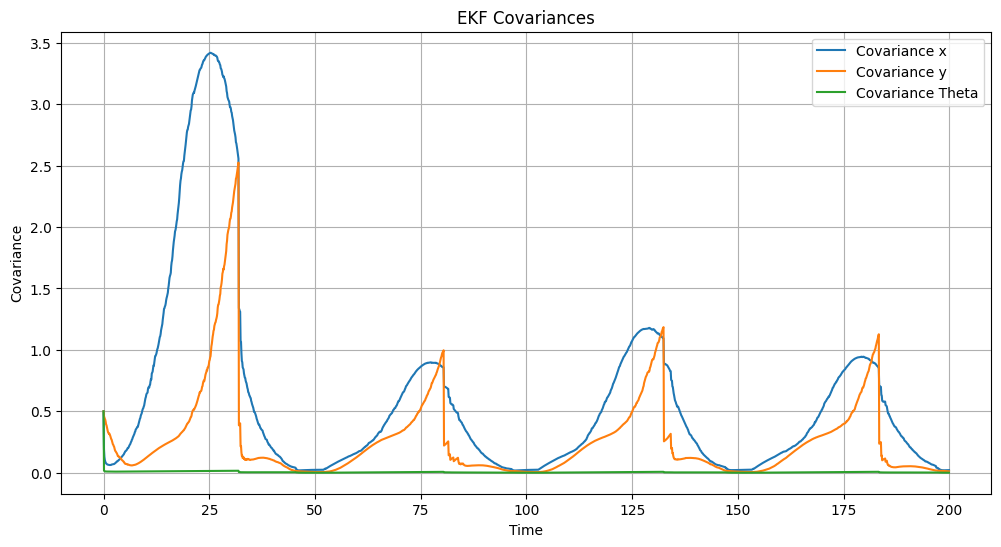

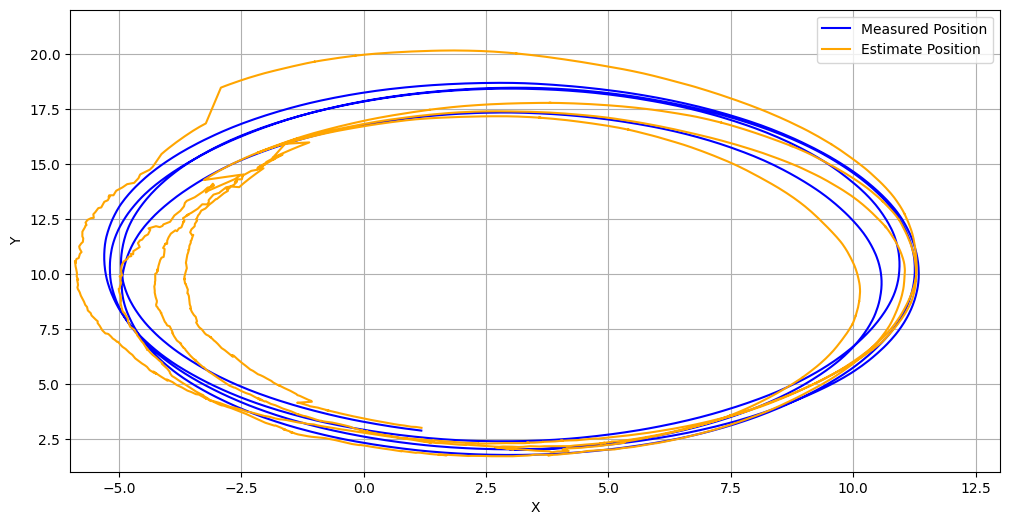

In [ ]:
task_3()

### **Task 4)**
Consider now that there are several beacons in the operation are, that the laser system still has the above
field of view constraint and that it only returns the information to the closest landmark. Also assume
that you have no prior information about the initial robot pose.
Design and implement an algorithm (based on the SLAM concept) to estimate the position of the robot
and the lcoations of the landmarks in the operation area.
Now assume that besides the field of view constraint the laser system only returns the range/bearing to
the closest landmark, not proving information to which lankmark the measrument refers . Update to
algorithm to deal with such feature. Use the data in file data4.txt to test the algorithm. The columns
of this file are t, x, y, θ, v, ω, r, ψ.


For this exercise EKF SLAM was implemented.
\
This was done by extending the state vector to include the beacons' positions:

Y_k : \begin{bmatrix}
X_k \\
x_{\text{beacon (0)}} \\
y_{\text{beacon (0)}} \\
\vdots \\
x_{\text{beacon} (n-1)} \\
y_{\text{beacon} (n-1)}
\end{bmatrix}

Similarly the covariance matrix was extended due to the beacons' covariances.
\
Like before, in each cycle, the Prediction step was followed by the Update step. However, these steps were slightly changed, due to the extended matrices. The following images help indicate the changes:
\
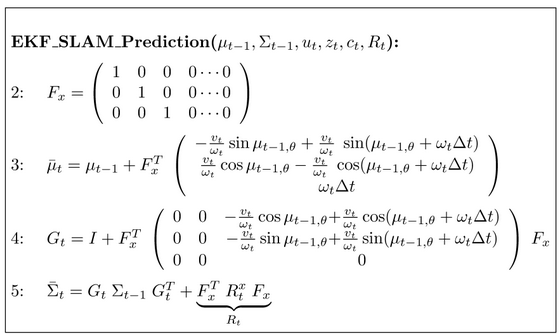
\
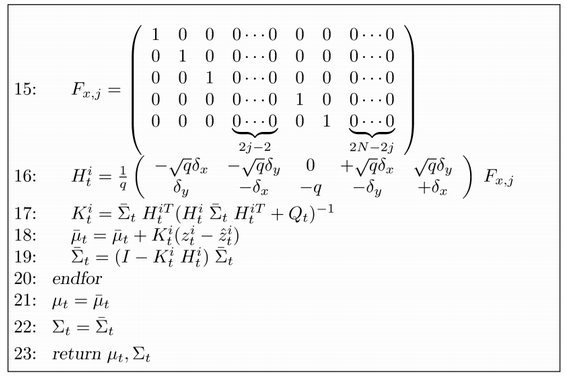

Reference: https://jihongju.github.io/2018/10/05/slam-05-ekf-slam/

\
The field of view constraint was handled like previously.
\
Since the number and positions of beacons was unknown, an algorithm was developed to determine if the measurment indicated a new beacon or if the beacon was already mapped in the Y state vector.
\
Using the estimated robot position and the received mesurment the estimated beacon position was computed. Then, this position was compared to every mapped beacon. The smallest of these distances was determined, which indicated the distance from the estimated beacon to its closest mapped beacon.
\
If this distance was above a defined treshold a new beacon was added to the state vector. If not, the beacon was already mapped.
\
This algorithm also provided the index of the beacon that the received measurements corresponded to. This was necessary for the EFK SLAM Update step.



\


### **SLAM EKF functions**

In [ ]:
## EKF SLAM Functions

# Calculates the Measurements Jacobian
def slam_measurements_jacobian(B_k, X_k, dist_e, bear_e):

    F_h = np.array([[-(B_k[0] - X_k[0]) / dist_e   , -(B_k[1] - X_k[1]) / dist_e    ,  0,  (B_k[0] - X_k[0]) / dist_e   , (B_k[1] - X_k[1]) / dist_e    ],
                    [ (B_k[1] - X_k[1])/(dist_e**2), -(B_k[0] - X_k[0]) /(dist_e**2), -1, -(B_k[1] - X_k[1])/(dist_e**2), (B_k[0] - X_k[0]) /(dist_e**2)]])

    return F_h

# Prediction Step. Resize some matrixes. Seems good and completed

# DUARTE APPROVED
def ekfslam_predict_step(X_k, U_k, P_k, F_x, F_w, Q, delta_t):

    # P matrix shape
    cov_size = P_k.shape[0]

    # Predict State: x-(k) = f(x+(k-1))
    X_k[0] = X_k[0] + (U_k[0]/U_k[1]*(  np.sin(X_k[2] + U_k[1]*delta_t) - np.sin(X_k[2])))
    X_k[1] = X_k[1] + (U_k[0]/U_k[1]*(- np.cos(X_k[2] + U_k[1]*delta_t) + np.cos(X_k[2])))
    X_k[2] = X_k[2] +  U_k[1]*delta_t
    X_k[2] = normalize_angle(X_k[2])

    # Resize F_x matrix to N.
    # F_new = np.array([[F_x, 0],
    #                   [0,   I]])
    F_x_new = np.eye(cov_size)
    F_x_new[:F_x.shape[0], :F_x.shape[1]] = F_x

    # Predict Covariance
    P_k = (F_x_new @ P_k @ F_x_new.T)
    # P_k has covariances of robot pose and Beacons. With Q we want to only affect the robot pose, so we add it to P_k[0 a 2][0 a 2]
    P_k[:F_w.shape[0], :F_w.shape[0]] = P_k[:F_w.shape[0], :F_w.shape[0]] + (F_w @ Q @ F_w.T)


    return X_k, P_k


# Update Step
def ekfslam_update_step(Y_k, P_k, F_h, Z_meas, Z_estimate, R, b_index):

    # Covariance Matrix Size
    cov_size = P_k.shape[0]

    # Auxiliary matrix of shape 5xcov_size
    F_reshape = np.zeros((5, cov_size))
    F_reshape[:3, :3]   = np.eye(3)     # Robot position
    # Rows 3 and 4 (5 exclusive), remember it starts at index 0
    F_reshape[3:5, (b_index*2 + 3):(b_index*2 + 3 + 2)] = np.eye(2)     # To consider the Beacons we want when multiplying

    # Reshape matrix F_h to 2xN
    F_h = F_h @ F_reshape

    # Calculate Kalman Gain
    S = F_h @ P_k @ F_h.T   # 2x2
    K = P_k @ F_h.T @ np.linalg.inv(S + R)  # cov_size x 2

    # Update Covariance Matrix
    P_k = (np.eye(cov_size) - (K @ F_h)) @ P_k

    # Measurements Difference
    Z_dif = measurements_error(Z_meas, Z_estimate)

    Y_k = Y_k + K @ (Z_dif)     # cov_size x 1
    Y_k[2] = normalize_angle(Y_k[2])

    return Y_k, P_k


# TODO: RELATE TRESHOLD WITH R
def checkWhichBeacon(Y_step, num_beacons, newDist, newBear, dist_threshold = 5): #5

  new_Beacon_absolute_position = measurements_beacon_estimate(Y_step[:3], newDist, newBear)

  smallest_beacon_absolute_distance = 1e6
  beacon_index = -1

  for i in range(num_beacons):

    old_Beacon_absolute_position = [Y_step[3 + 2 * i], Y_step[3 + 2 * i + 1]]

    beacons_absolute_distance = np.sqrt((old_Beacon_absolute_position[0]-new_Beacon_absolute_position[0])**2 +
                                             (old_Beacon_absolute_position[1]-new_Beacon_absolute_position[1])**2)


    if beacons_absolute_distance < smallest_beacon_absolute_distance: #and bear_diff < bear_treshold:
        beacon_index = i
        smallest_beacon_absolute_distance = beacons_absolute_distance

  # New Beacon if big distance from existing beacons
  if(smallest_beacon_absolute_distance > dist_threshold):
    return num_beacons - 1 + 1 # last index num_beacons - 1, +1
  else:
    return beacon_index # Beacon already exists, return its index



In [ ]:
## Task 4 - EKF SLAM
def task_4():

  # Read data file
  file = prefix + 'data4.txt'
  read_data(file)

  steps = len(t_real)             # Number of steps
  delta_t = t_real[1]- t_real[0]  # 0.1 seconds


  ## Covariances and Noise
  # Inputs Covariance
  sigma_linvel = 0.5
  sigma_omega  = 0.05

  # Beacons Covariance
  sigma_dist = 0.5
  sigma_bear = 0.1

  Q = np.array([[sigma_linvel**2, 0],
                [0,  sigma_omega**2]])

  R = np.array( [[sigma_dist**2,  0],             # TODO: Maybe add distance here
                 [0,  sigma_bear**2]])

  # System state and Observations, both will increase in size
  Y , P = [], []
  Y.append(np.array([x_real[0], y_real[0], theta_real[0]]))   # Will be multiple column matrixes
  P.append(np.eye(3)*0.5)

  # For printing later
  Y_x_y_theta = []
  Beacons = []

  for step in range(steps):

    # Initialize one time variables
    P_step = P[step]
    Y_step = Y[step]

    # Normalize Theta
    Y_step[2] = normalize_angle(Y_step[2])

    ## Same as localization
    # Prior Jacobian Estimate
    F_x, F_w = linearize_states(Y_step[2], v_meas[step], omega_meas[step], delta_t)
    U = [v_meas[step], omega_meas[step]]

    # Predict Step
    Y_step[:3], P_step = ekfslam_predict_step(Y_step[:3], U, P_step, F_x, F_w, Q, delta_t)


    ## Check if have measurements
    if (r_1_meas[step] != 0):
      dist = r_1_meas[step]
      bear = normalize_angle(phi_1_meas[step])

      num_beacons = int((P_step.shape[0]-3)/2)
      # Check which beacon measurements corresponds to, if new beacon add it
      beacon_index = checkWhichBeacon(Y_step, num_beacons, dist, bear)

      # New beacon
      if beacon_index > num_beacons - 1 : # -1 cuz index

        # Update Detected Beacon index
        print("New Beacon at time: ", t_real[step])
        beacon_index = num_beacons - 1 + 1 # beacon index is current max index +1

        # Estimated beacon position based on measurements
        Beacon_absolute_position = measurements_beacon_estimate(Y_step[:3], dist, bear)



        # Increment new Beacon to Y matrix
        Y_new = np.zeros((Y_step.shape[0] + 2)) # Add 2 new elements for beacon x&y
        Y_new[:Y_step.shape[0]] = Y_step
        Y_new[(Y_new.shape[0]-2):Y_new.shape[0]] = Beacon_absolute_position # Add new Beacon Measurement
        Y_step = copy.deepcopy(Y_new)
        Beacons.append(Beacon_absolute_position) # for printing later, dont want to go trough Y again


        # New Covariance Matrix
        P_new = np.eye(P_step.shape[1] + 2)                     # Add 2 new rows for beacon x&y
        P_new[:P_step.shape[0], :P_step.shape[1]] = P_step      # Add previous covariance to new matrix
        P_step = copy.deepcopy(P_new)



        ## Update measurements based on existing beacon
        # Detected Beacon
        Beacon_detect = [Y_step[3 + 2 * beacon_index], Y_step[3 + 2 * beacon_index + 1]]

        # Expected dist and bearing measurements
        Z = beacons_location_from_robot(Y_step[:3], Beacon_detect)
        F_h = slam_measurements_jacobian(Beacon_detect, Y_step[:3], Z[0], Z[1])

        # Update step
        Y_step, P_step = ekfslam_update_step(Y_step, P_step, F_h, [r_1_meas[step], normalize_angle(phi_1_meas[step])], Z, R, beacon_index)
        #print("Update at time: ", t_real[step])

    # Append values
    Y_x_y_theta.append(copy.deepcopy(Y_step[:3])) # for printing later, dont want to go trough Y again
    Y.append(copy.deepcopy(Y_step))
    P.append(copy.deepcopy(P_step))


  plot_data(Y_x_y_theta, P, Beacons, 0, -1)
  if plotVideos == True:
    plot_position_video(Y_x_y_theta, x_real, y_real, 0, -1)


Read from file  2000  lines and  8 columns
Successfully read data!
New Beacon at time:  0.0
New Beacon at time:  3.8
New Beacon at time:  14.8
New Beacon at time:  32.0
New Beacon at time:  47.9
New Beacon at time:  54.8
New Beacon at time:  69.0
New Beacon at time:  86.0
New Beacon at time:  160.0


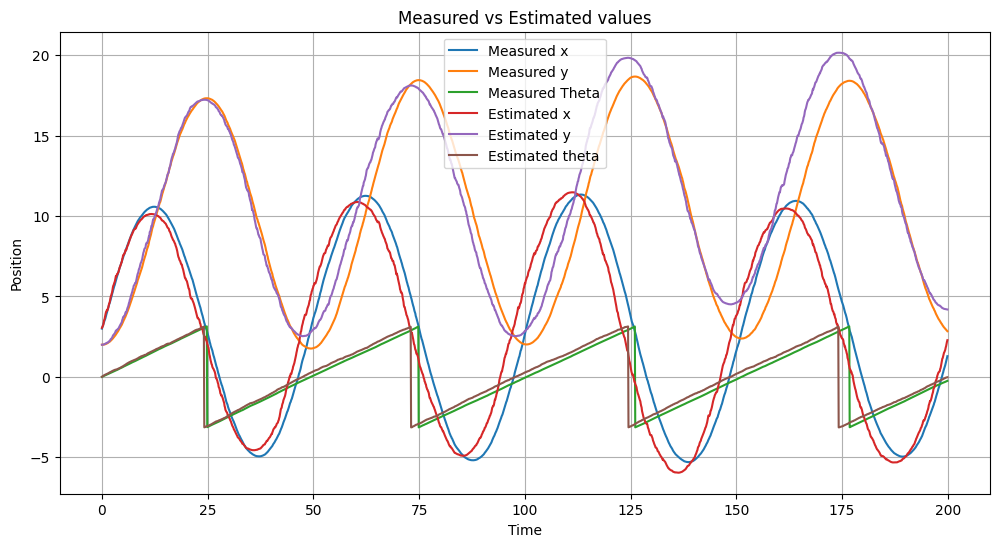

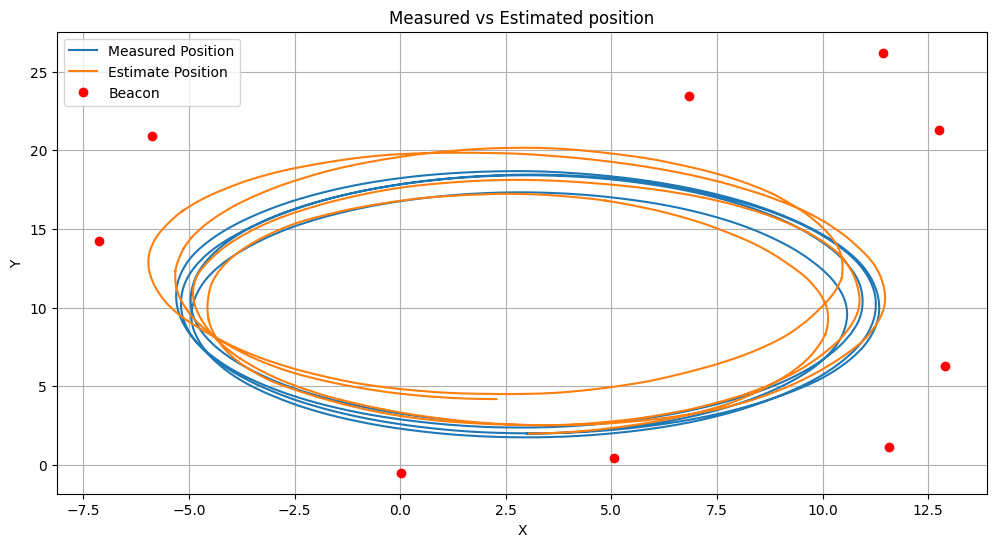

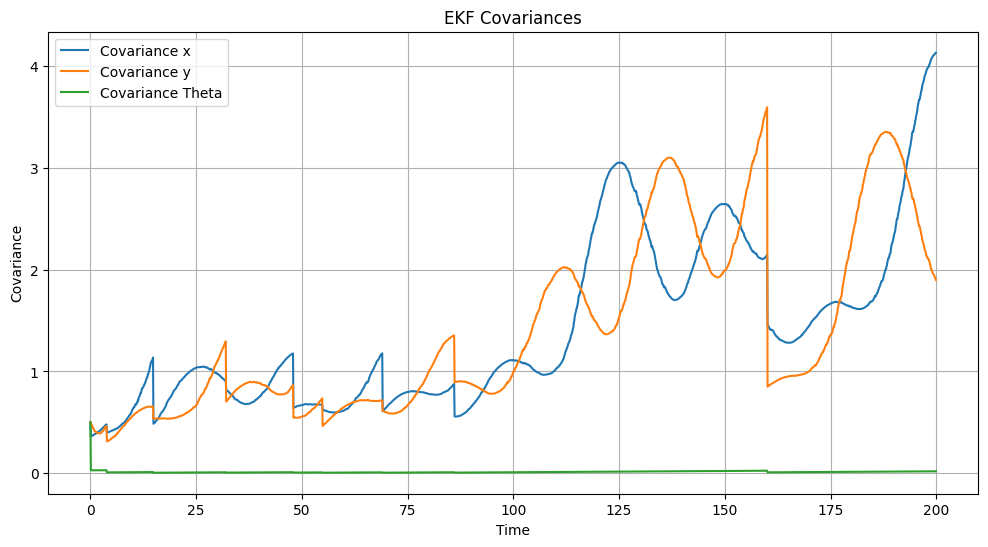

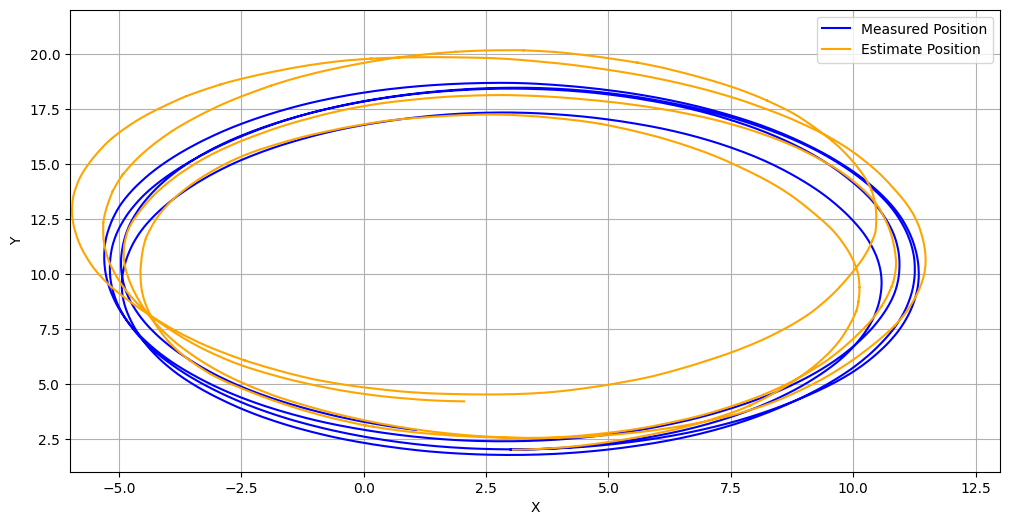

In [ ]:
task_4()